In [17]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
df = pd.read_excel('credit_card_defaults.xls')
df.head(4)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


As we can see from the above cell, the columns of the dataframe are not properly labelled. We will have to do a little bit of cleaning, one step at a time.

In [19]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [20]:
df.iloc[0].head(6)

Unnamed: 0           ID
X1            LIMIT_BAL
X2                  SEX
X3            EDUCATION
X4             MARRIAGE
X5                  AGE
Name: 0, dtype: object

We'll remove the present columns and replace them with the values  of the first row in the dataframe

In [21]:
df.columns = df.iloc[0]
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [22]:
df.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


As we've successfully changed the names of the columns, we'll drop the first row of the dataframe.

In [23]:
df = df.drop(index=0)

In [24]:
assert(df.index == df['ID']).all(), \
'The index is not the same as the ID column'

In [25]:
# Since the ID columns is the same as the index, well drop it as it won't be useful in our analysis
df.drop(labels=['ID'], axis=1, inplace=True)

In [26]:
df.columns = df.columns.str.lower()
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [10]:
for i in df.columns:
    ty = df[i].astype('int64')
    print(ty.dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [28]:
def convert(data):
    for col in data.columns:
        data[col] = data[col].astype('int64')
    return data
convert(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_bal                   30000 non-null  int64
 1   sex                         30000 non-null  int64
 2   education                   30000 non-null  int64
 3   marriage                    30000 non-null  int64
 4   age                         30000 non-null  int64
 5   pay_0                       30000 non-null  int64
 6   pay_2                       30000 non-null  int64
 7   pay_3                       30000 non-null  int64
 8   pay_4                       30000 non-null  int64
 9   pay_5                       30000 non-null  int64
 10  pay_6                       30000 non-null  int64
 11  bill_amt1                   30000 non-null  int64
 12  bill_amt2                   30000 non-null  int64
 13  bill_amt3                   30000 non-null  int64
 14  bill_a

AttributeError: 'NoneType' object has no attribute 'columns'

In [84]:
df.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [86]:
df.describe().T

,count,unique,top,freq
0,,,,
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764
PAY_4,30000,11,0,16455


In [87]:
df.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### DATA PREPROCESSING

Let's look at the unique values in the columns. The motive behind looking at unique values in a column is to identify the subcategory in each column.

In [88]:
df.columns = df.columns.str.lower()
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [89]:
#Finding unique values in the SEX column
print('Sex ' + str(sorted(df['sex'].unique()[1:])))

Sex [1]


In [90]:
#Findning unique values in the EDUCATION column
print('Education ' + str(sorted(df['education'].unique()[1:])))

Education [0, 1, 3, 4, 5, 6]


In [91]:
#Finding the unqiue values in the MARRIAGE column
print('Marriage ' + str(sorted(df['marriage'].unique()[1:])))

Marriage [0, 2, 3]


In [92]:
#Unique values from the Pay_0 column
print('Pay_0 ' + str(sorted(df['pay_0'].unique()[1:])))

Pay_0 [-2, -1, 0, 1, 3, 4, 5, 6, 7, 8]


In [93]:
print('default.payment.next.month ' \
+ str(sorted(df['default payment next month'].unique()[1:])))

default.payment.next.month [0]


In [94]:
"""The EDUCATION column has 7 unique values, but as per our data description,
   we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4:"""
fill = (df.education==0) | (df.education==5) | (df.education==6)
df.loc[fill, 'education'] = 4
print('Education ' + str(sorted(df['education'].unique())))

Education [1, 2, 3, 4]


In [95]:
df.head(4)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [96]:
"""Similarly, in the MARRIAGE column, according to the data description, we should
have 3 unique values. But here, we have 4 values in our data. As per our data
description, the MARRIAGE column should have three subcategories. So, we combine
category 0 with category 2 (Single):"""
fill = (df.marriage == 0)
df.loc[fill, 'marriage'] = 2
print('Marriage ' + str(sorted(df['marriage'].unique())))

Marriage [1, 2, 3]


In [97]:
df = df.rename(mapper={'default payment next month':'default', 'pay_0':'pay_1'}, axis=1 )
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object', name=0)

#### Exploratory Data Analysis

#### Univariate Analysis

Univariate analysis is the simplest form of analysis where we analyze each feature (that is, each column of a DataFrame) and try to uncover the pattern or distribution of the data. We'll be analyzing categorical features(default, sex, education and marriage.)

In [98]:
df.head(3)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


Let's begin with each of the variables one by one

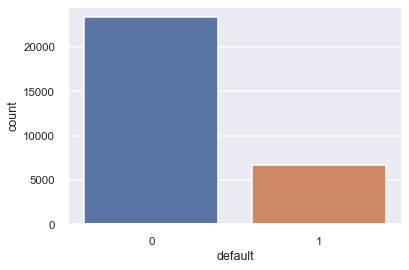

In [99]:
#The default column
sns.countplot(x='default', data=df);

In [100]:
df.shape[0]

30000

In [101]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [102]:
(df['default'].value_counts() * 100)/30000

0    77.88
1    22.12
Name: default, dtype: float64

From the preceding output, we see that around 6636 defaulted out of 30000 which is about 22%

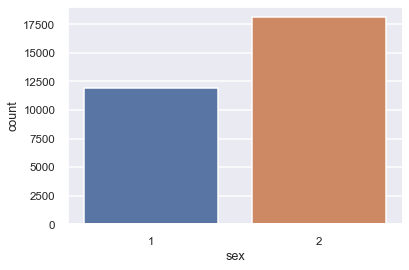

In [103]:
#The sex column
sns.countplot(x='sex', data=df);

In [104]:
df.sex.value_counts()

2    18112
1    11888
Name: sex, dtype: int64

In [105]:
(df.sex.value_counts()*100)/30000

2    60.373333
1    39.626667
Name: sex, dtype: float64

From the preceding output, there are 18112 female(about 60%) and 11888 male(approximately 40%) in the dataset.

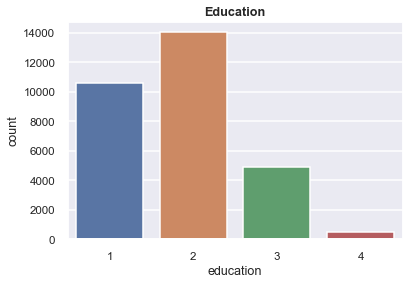

In [106]:
#The education column
sns.countplot(x='education', data=df)
plt.title("Education", weight='bold');

In [107]:
df.education.value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [108]:
(df.education.value_counts()*100)/30000

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: education, dtype: float64

From the preceding outputs, most of the customers either went to University or Graduate school.

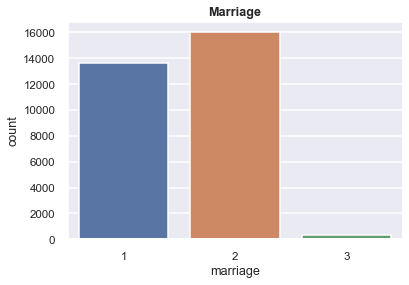

In [109]:
#The marriage column
sns.countplot(x='marriage', data=df)
plt.title("Marriage", weight='bold');

In [110]:
df.marriage.value_counts()

2    16018
1    13659
3      323
Name: marriage, dtype: int64

From the preceding output, most of the customers are Single and Married people.

#### Bivariate Analysis

Bivariate analysis is performed between two variables to look at their relationship.

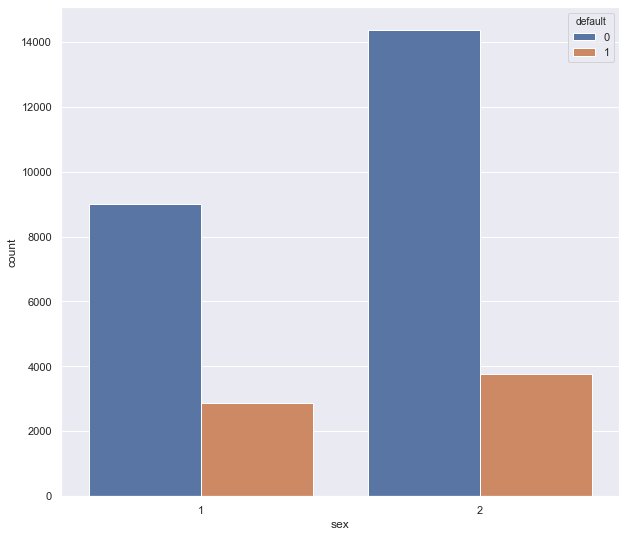

In [111]:
""" We'll be seeing the relationship between the sex and default column to know compare 
    the number of male customers who have defaulted to the number of female customers that
    have also defaulted."""
sns.set(rc={'figure.figsize':(10,9)})
edu = sns.countplot(x='sex', hue='default', data=df)
plt.show()

From the preceding output, we can see that more females have defaulted compared to the males, this graph does not give us the complete picture as there are more female customers than male customers.

In [112]:
pd.crosstab(df.sex, df.default, margins=True)

default,0,1,All
sex,,,
1,9015,2873,11888
2,14349,3763,18112
All,23364,6636,30000


In [113]:
pd.crosstab(df.sex, df.default, normalize='index', margins=True)

default,0,1
sex,,
1,0.758328,0.241672
2,0.792237,0.207763
All,0.778800,0.221200


The preceding output tells us that 24% of male customers have defaulted while 20% of female customers have defaulted.

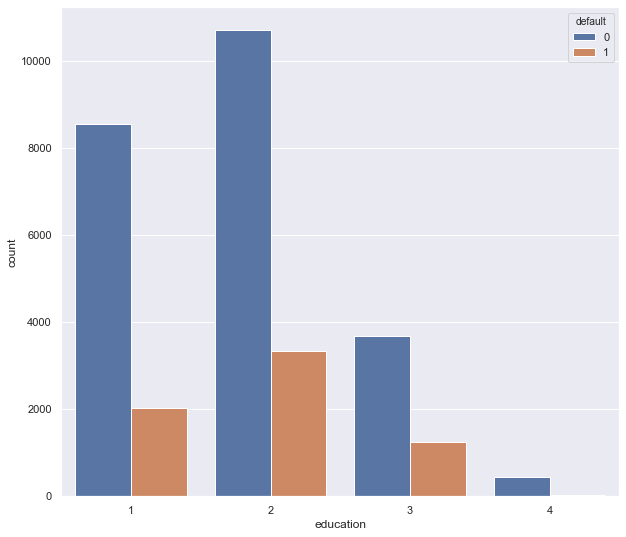

In [114]:
# The education and default column
sns.countplot(x='education', hue='default', data=df)
plt.show()

From the preceding output, the customers that went to University have defaulted the most followed by the ones who attended Graduate school. This graph does not tell the whole story we'll need to check the actual values and percentage.

In [115]:
pd.crosstab(df.education, df.default, margins=True)

default,0,1,All
education,,,
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,435,33,468
All,23364,6636,30000


In [116]:
pd.crosstab(df.education, df.default, normalize='index', margins=True)

default,0,1
education,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513
All,0.778800,0.221200


From the preceding output, 25% of High school customers defaulted, 23% of University customers defaulted.

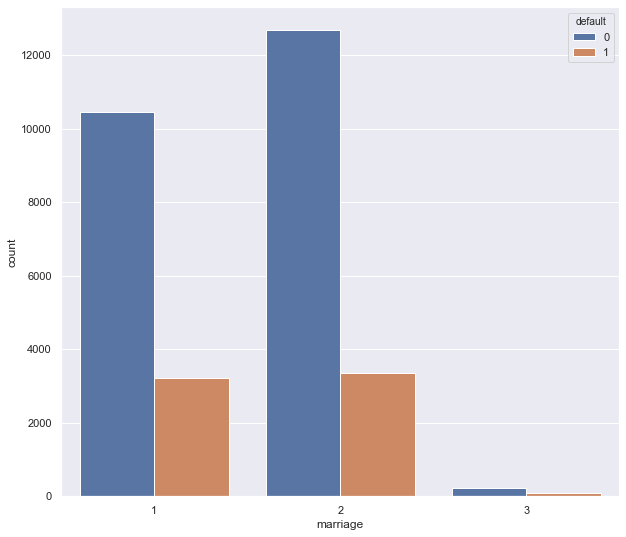

In [117]:
# The marriage and default column.
sns.countplot(x='marriage', hue='default', data=df)
plt.show()

In [118]:
pd.crosstab(df.marriage, df.default, margins=True)

default,0,1,All
marriage,,,
1,10453,3206,13659
2,12672,3346,16018
3,239,84,323
All,23364,6636,30000


In [119]:
pd.crosstab(df.marriage, df.default, normalize='index', margins=True)

default,0,1
marriage,,
1,0.765283,0.234717
2,0.791110,0.208890
3,0.739938,0.260062
All,0.778800,0.221200


From the preceding output, most defaulters are divorced(26%), followed by the married(23%) people.

In [120]:
df.pay_1.values

array([2, -1, 0, ..., 4, 1, 0], dtype=object)

The Pay_1(the repayment status in the month of September 2005) and default column.
For the pay_1 column, we won't be mapping the values as it won't be visible on the dataframe.
-1=Paid on time, 1=Payment delay for 1 month, 2=Payment delay for 2 months thorough 8. 9 is for 9 months and above.

In [121]:
pd.crosstab(df.pay_1, df.default, margins=True)

default,0,1,All
pay_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


From the output of the crosstab function, we can see that the maximum count of defaults falls under subcategory 2—that is, a payment delay for the last 2 months. This implies that a customer who has missed payments for 2 continuous months has a high probability of default.

(50000, 1049938.301330458)

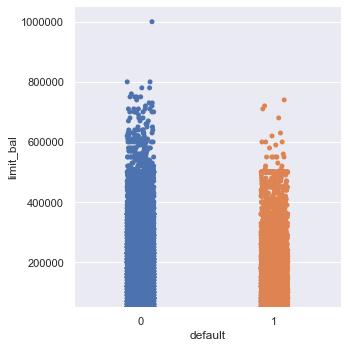

In [122]:
# limit_Balance and default column
"""The balance is the amount given as credit. It includes both the individual consumer's
credit and their family's (supplementary) credit."""
sns.set(rc={'figure.figsize':(15,15)})
sns.catplot(x='default', y='limit_bal', jitter=True, data=df)
plt.ylim(50000)

From the above plot, we can infer that customers with higher balances have lower likelihood of default than those with lower balance amounts.

In [123]:
pd.crosstab(df.age, df.default)

default,0,1
age,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


<b>As we can see from the preceding output, age 27 and 29 have the highest defaults.</b>

In [125]:
pd.crosstab(df.age, df.default, normalize='index', margins=True).head(10)

default,0,1
age,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


<b></b>

In [126]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

In [127]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object', name=0)

In [132]:
sns.heatmap(df.corr(method='spearman'), \
            cmap='rainbow_r', annot=True)

ValueError: zero-size array to reduction operation minimum which has no identity

In [156]:
cols = ['sex', 'default']
df2 = df.copy()
df2[cols].corr()

""


In [147]:
df2.corr()

""


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit_bal  30000 non-null  object
 1   sex        30000 non-null  object
 2   education  30000 non-null  object
 3   marriage   30000 non-null  object
 4   age        30000 non-null  object
 5   pay_1      30000 non-null  object
 6   pay_2      30000 non-null  object
 7   pay_3      30000 non-null  object
 8   pay_4      30000 non-null  object
 9   pay_5      30000 non-null  object
 10  pay_6      30000 non-null  object
 11  bill_amt1  30000 non-null  object
 12  bill_amt2  30000 non-null  object
 13  bill_amt3  30000 non-null  object
 14  bill_amt4  30000 non-null  object
 15  bill_amt5  30000 non-null  object
 16  bill_amt6  30000 non-null  object
 17  pay_amt1   30000 non-null  object
 18  pay_amt2   30000 non-null  object
 19  pay_amt3   30000 non-null  object
 20  pay_amt4   30000 non-null  o

In [ ]:
df2.corr